In [1]:
import numpy as np
import librosa.display, os
import matplotlib.pyplot as plt
%matplotlib inline

def create_spectrogram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(audio_file)
    ms = librosa.feature.melspectrogram(y = y, sr = sr)
    log_ms = librosa.power_to_db(ms, ref=np.max)
    librosa.display.specshow(log_ms, sr=sr)

    fig.savefig(image_file)
    plt.close(fig)
    
def create_pngs_from_wavs(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.wav', '.png'))
        create_spectrogram(input_file, output_file)

In [2]:
create_pngs_from_wavs('Dataset/IRMAS_Training_Data/cel', 'Spectrograms/cel')

In [3]:
create_pngs_from_wavs('Dataset/IRMAS_Training_Data/cla', 'Spectrograms/cla')

In [4]:
create_pngs_from_wavs('Dataset/IRMAS_Training_Data/flu', 'Spectrograms/flu')

In [5]:
create_pngs_from_wavs('Dataset/IRMAS_Training_Data/gac', 'Spectrograms/gac')

In [6]:
create_pngs_from_wavs('Dataset/IRMAS_Training_Data/gel', 'Spectrograms/gel')

In [7]:
create_pngs_from_wavs('Dataset/IRMAS_Training_Data/org', 'Spectrograms/org')

In [8]:
create_pngs_from_wavs('Dataset/IRMAS_Training_Data/pia', 'Spectrograms/pia')

In [9]:
create_pngs_from_wavs('Dataset/IRMAS_Training_Data/sax', 'Spectrograms/sax')

In [10]:
create_pngs_from_wavs('Dataset/IRMAS_Training_Data/tru', 'Spectrograms/tru')

In [11]:
create_pngs_from_wavs('Dataset/IRMAS_Training_Data/vio', 'Spectrograms/vio')

In [12]:
create_pngs_from_wavs('Dataset/IRMAS_Training_Data/voi', 'Spectrograms/voi')

In [17]:
# from keras.preprocessing import image
import keras.utils as image
import os
import matplotlib.pyplot as plt

NUM_INSTRUMENTS = 11

def load_images_from_path(path, label):
    images = []
    labels = []
    temp_label = [False for _ in range(NUM_INSTRUMENTS)]
    temp_label[label] = True

    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        labels.append((temp_label))
        
    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)
        
x = []
y = []

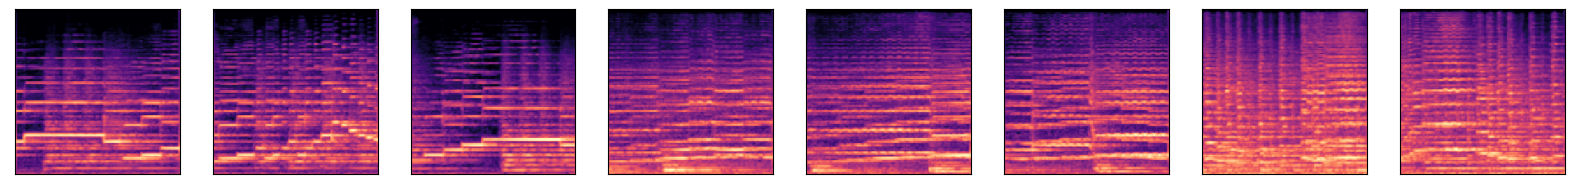

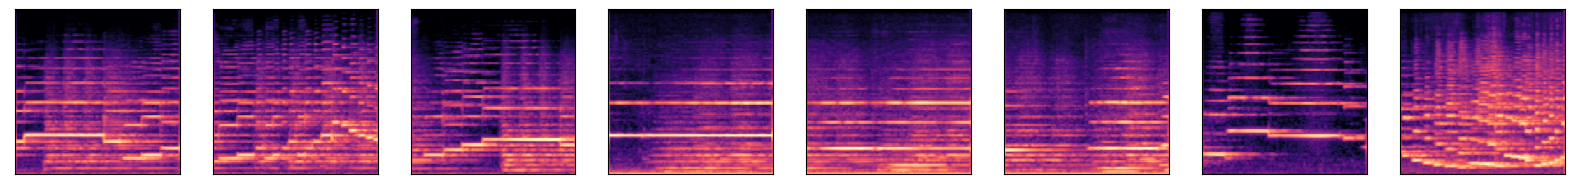

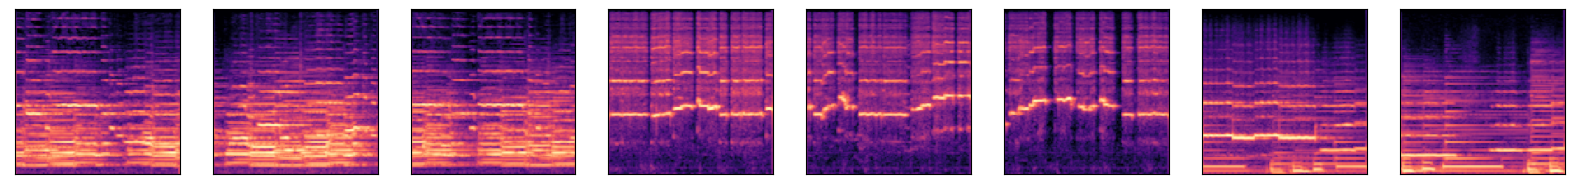

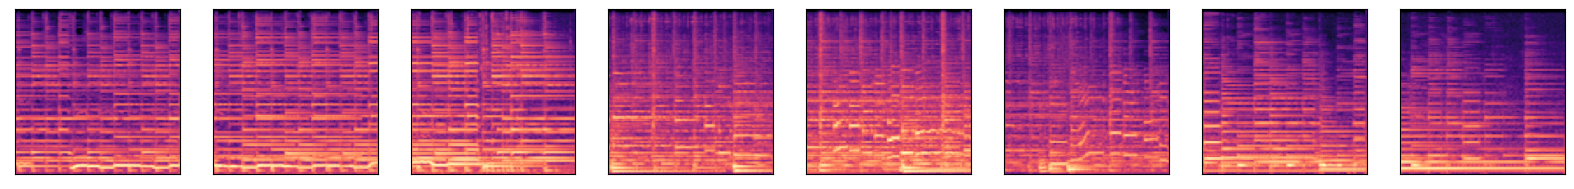

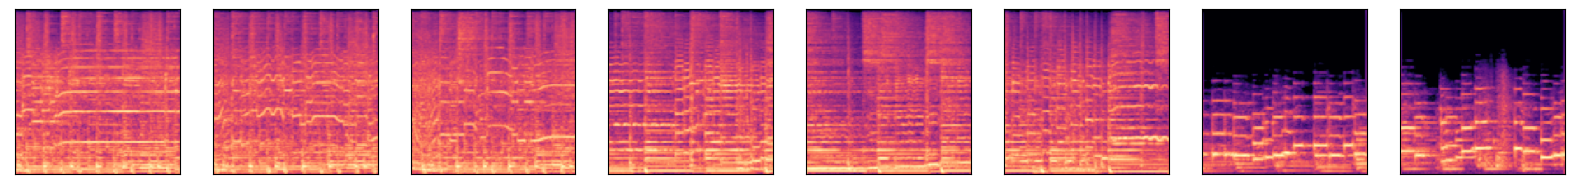

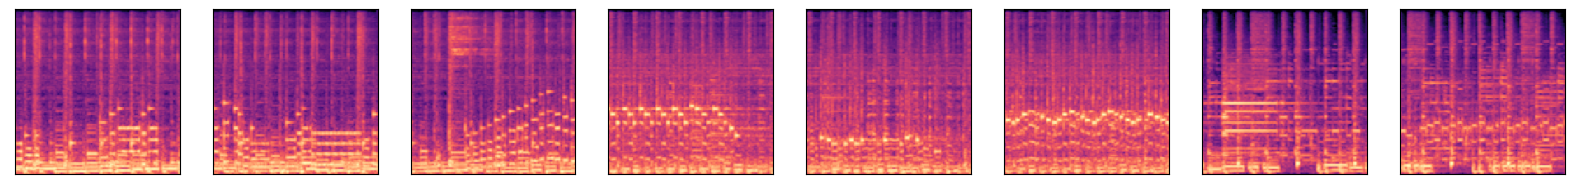

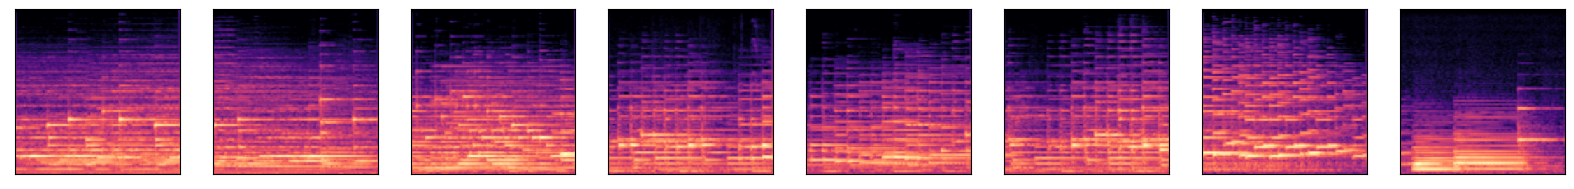

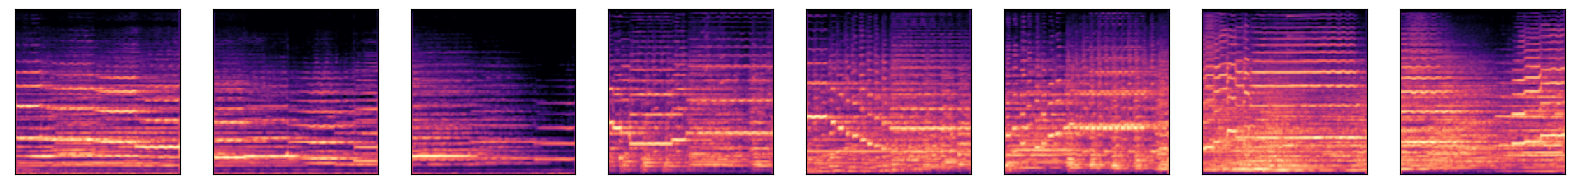

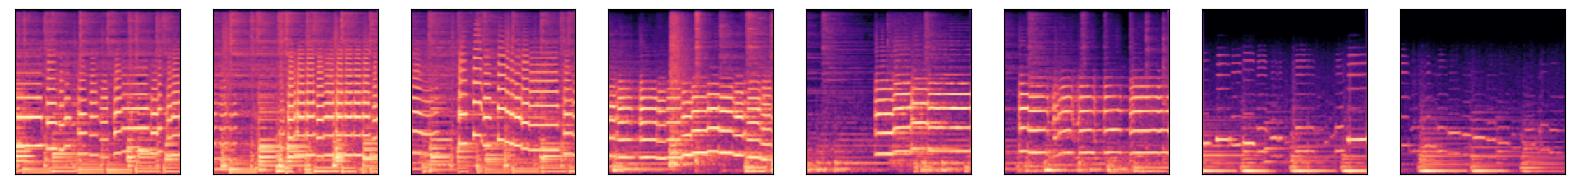

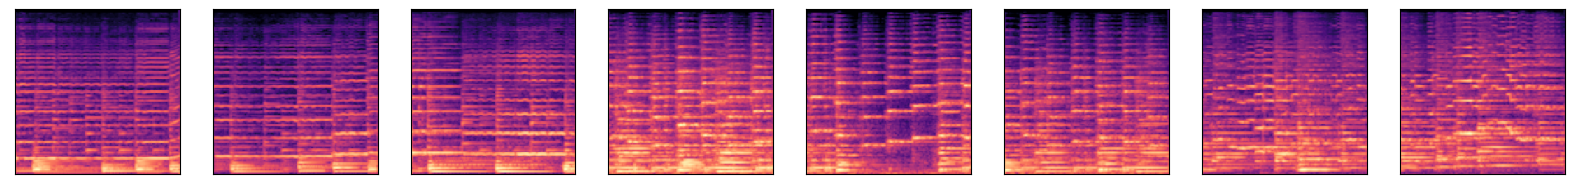

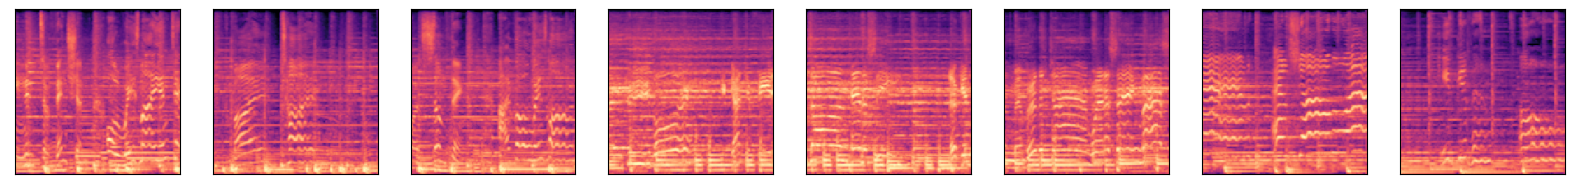

In [18]:
instruments = ["cel", "cla", "flu", "gac", "gel", "org", "pia", "sax", "tru", "vio", "voi"]

for i in range(len(instruments)):
    images, labels = load_images_from_path('Spectrograms/{}'.format(instruments[i]), i)
    show_images(images)
    
    x += images
    y += labels
    